In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
data = pd.read_csv('/content/data_evaluacion.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Agregamos la fila de encabezado
header = [
    'edad', 'clase_de_trabajo', 'fnlwgt', 'educación', 'num_educativo',
    'estado_civil', 'ocupación', 'relación', 'raza', 'género',
    'ganancia_de_capital', 'pérdida_de_capital', 'horas_por_semana',
    'país_nativo', 'ingresos'
]
df_header = pd.DataFrame([header])
data.columns = header
data.head()

,edad,clase_de_trabajo,fnlwgt,educación,num_educativo,estado_civil,ocupación,relación,raza,género,ganancia_de_capital,pérdida_de_capital,horas_por_semana,país_nativo,ingresos
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
## Selección de caracteristicas
X = data.drop("ingresos", axis=1)
y = data['ingresos']

In [ ]:
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':  # Check if the column is of object (string) type
        X[column] = label_encoder.fit_transform(X[column])

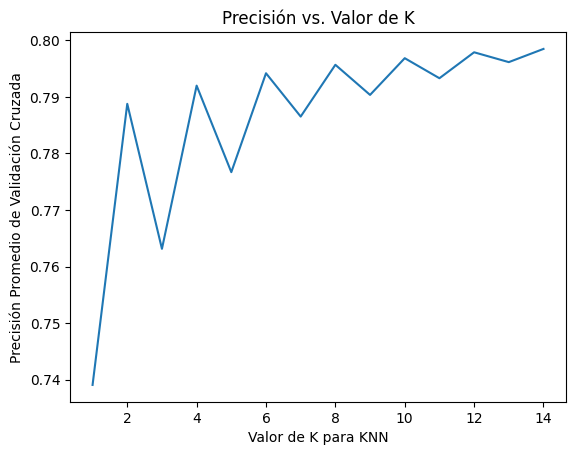

El mejor valor de k es: 14


In [ ]:
# Rango de valores de k a probar
k_range = range(1, 15)

# Lista para almacenar la precisión promedio para cada valor de k
k_scores = []

# Bucle para calcular la precisión promedio para cada valor de k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')  # Usando validación cruzada de 10 pliegues
    k_scores.append(scores.mean())

# Graficar la precisión promedio para cada valor de k
plt.plot(k_range, k_scores)
plt.xlabel('Valor de K para KNN')
plt.ylabel('Precisión Promedio de Validación Cruzada')
plt.title('Precisión vs. Valor de K')
plt.show()

# Encontrar el valor de k con la mayor precisión
best_k = k_range[k_scores.index(max(k_scores))]
print("El mejor valor de k es:", best_k)

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Crear el modelo KNN con el mejor valor de k
knn = KNeighborsClassifier(n_neighbors=best_k)

# Ajustar el modelo a los datos de entrenamiento
knn.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = knn.predict(X_test)
# Para el conjunto de prueba
y_train_pred = knn.predict(X_train)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       <=50K       0.80      0.98      0.88      7414
        >50K       0.77      0.22      0.35      2355

    accuracy                           0.80      9769
   macro avg       0.78      0.60      0.61      9769
weighted avg       0.79      0.80      0.75      9769



In [17]:
# Evaluar el modelo
print("Entrenamiento Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precisión del modelo KNN:", accuracy_score(y_test, y_pred))

Entrenamiento Accuracy: 0.8091009136744043
Precisión del modelo KNN: 0.7964991299007064


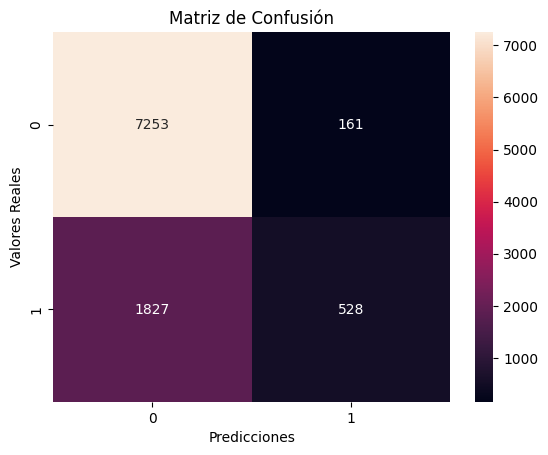

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

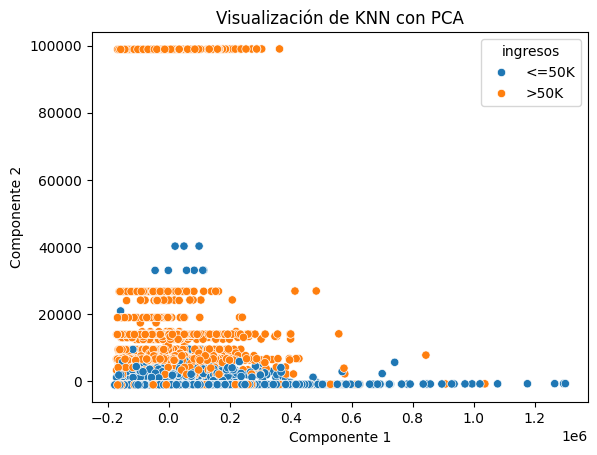

In [ ]:
# Reducir la dimensionalidad de los datos a 2D usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear un DataFrame con los datos reducidos y las etiquetas
df_pca = pd.DataFrame(X_pca, columns=['Componente 1', 'Componente 2'])
df_pca['ingresos'] = y

# Visualizar los datos usando sns.scatterplot
sns.scatterplot(x='Componente 1', y='Componente 2', hue='ingresos', data=df_pca)
plt.title('Visualización de KNN con PCA')
plt.show()


## Conclusiones
En el reporte de clasificacion vemos que para ambas clases tanto para el 0 (<=50) y la clase 1 (>50) el modelo predice y tiene un buen rendimiento por la precisión de 80% y 77%.
La sensibilidad vemos que baja para la segunda clase que no identifica bien esto puede solucionarse con un ajuste en el modelo, equilibrando mejor los datos para entrenamiento y para test

En cuanto al aprendizaje vemos que el modelo si aprende y no memoriza y esto podemos darnos cuenta en la diferencia entre el acurracy de entrenamiento y de prueba que es del 1% aproximadamente.